<a href="https://colab.research.google.com/github/EnsiyehRaoufi/EnsiyehRaoufi/blob/main/Diabetes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Model**

The well known Diabetes dataset already has it's data cleaned and normalized, so no need to do any of those steps. 

The steps to complete this exercise are:

* Load the diabetes dataset into a dataframe.
* Check the table summary to show that indeed the mean is zero for all features.
* Split the dataset into train, validation, and test sets
* Use a linear regression Ridge model to fit and score:
* Fit and score on the whole dataset
* Fit on train, score on validation, using default model
* Fit on train, score on validation, using hyperparameters model
* Fit on train, score on test, using hyperparameterized model
* Plot all scores in a bar graph

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [6]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

# Include the target as well
df['target'] = diabetes['target']

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
# Describe df using table summary.
# No need to normalize, near zero mean.
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [9]:
# train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

# train: 0.6 | validation: 0.2
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=0)

# Final dataset sizes: train: 0.6, validation: 0.2, text: 0.2

In [10]:
# How does the model perform on the entire dataset and default model parameters
reg = Ridge().fit(df[diabetes['feature_names']], df['target'])
all_df_score = reg.score(df[diabetes['feature_names']], df['target'])
all_df_score

0.4512313946799055

In [11]:
# How does the model perform on the training dataset and default model parameters
# Remember we use the validation dataset score the model
reg = Ridge().fit(df_train[diabetes['feature_names']], df_train['target'])
val_df_score = reg.score(df_val[diabetes['feature_names']], df_val['target'])
val_df_score

0.40971205701549696

In [29]:
# How does the model perform on the training dataset and different model parameters
# Change alpha (default=1.0), solver, and max_iter

reg_h = Ridge(alpha=0.01).fit(df_train[diabetes['feature_names']], df_train['target'])
val_df_h_score = reg_h.score(df_val[diabetes['feature_names']], df_val['target'])
val_df_h_score

0.5490880012649908

In [30]:
# Use optimized model on the held out test dataset.
test_df_h_score = reg_h.score(df_test[diabetes['feature_names']], df_test['target'])
test_df_h_score

0.34396017837369763

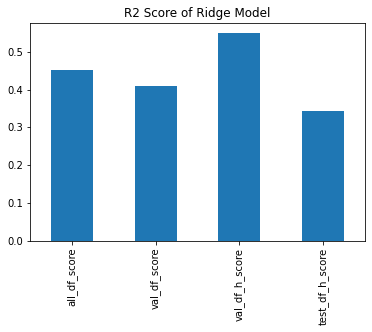

In [37]:
# Bar plot of all scores from each model fit: all_df_score, val_df_score, val_df_h_score, test_df_h_score
pd.Series({
        "all_df_score": all_df_score,
        "val_df_score": val_df_score,
        "val_df_h_score": val_df_h_score,
        "test_df_h_score": test_df_h_score,
}).plot(kind="bar", legend=False, title="R2 Score of Ridge Model")